https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W2/ungraded_labs/C1_W2_Lab_1_beyond_hello_world.ipynb

In [1]:
import tensorflow as tf
print(tf.__version__)

fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

2.12.0
4422102/4422102 [==============================] - 0s 0us/step


LABEL :9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1 

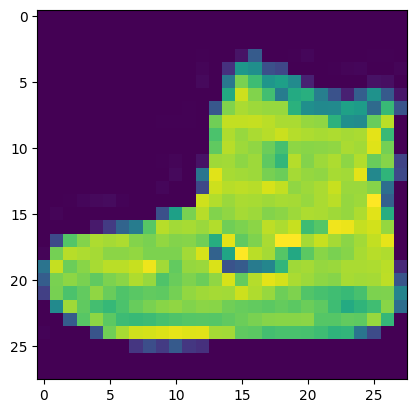

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 0

np.set_printoptions(linewidth = 320)

# Print the label and image
print(f'LABEL :{training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [3]:
# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

In [4]:
# Buildw the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [5]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function : {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'ouput of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function : [[1. 3. 4. 2.]]
ouput of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 0.9999999999999999
class with highest probability: 2


In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falss below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the Loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [13]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(training_images, training_labels, epochs = 5, callbacks = [callbacks])

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.4972 - accuracy: 0.8253
Epoch 2/5
1858/1875 [============================>.] - ETA: 0s - loss: 0.3709 - accuracy: 0.8664
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3707 - accuracy: 0.8665


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

# Assignment Part

In [12]:
import tensorflow as tf
from os import path, getcwd, chdir
import matplotlib.pyplot as plt


path = "/content/sample_data/mnist.npz"
print(path)

/content/sample_data/mnist.npz


5
28


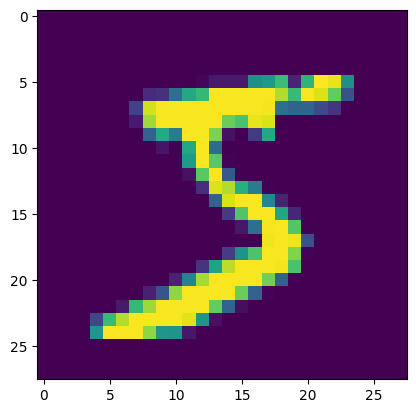

In [15]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path = path)
print(y_train[0])
print(len(x_train[0]))
plt.imshow(x_train[0])

In [16]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('loss') < 0.1):
      print("\nLoss is lower than 0.1 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

x_train = x_train / 255
x_test = x_test / 255

In [18]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)])
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(x_train, y_train, epochs = 100, callbacks = [callbacks])

Epoch 1/100
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2585 - accuracy: 0.9259
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1128 - accuracy: 0.9663
Epoch 3/100
1867/1875 [============================>.] - ETA: 0s - loss: 0.0776 - accuracy: 0.9766
Loss is lower than 0.1 so cancelling training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0774 - accuracy: 0.9766


In [19]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0823 - accuracy: 0.9742


[0.08233227580785751, 0.9742000102996826]